# Week 4 Notes

## 4.1.1: Getting Started with Pandas

In this case study, we will attempt to group different samples of whiskey using their flavor characteristics.

``pandas`` is built on top of NumPy and is a great tool for data analysis.
- ``pandas.Series`` is a 1-dimensional array-like object with a name and index.
- ``pandas.DataFrame`` is a 2-dimensional array-like object with a column and row labels.

To create a ``pandas.Series``, we can use the ``pandas.Series()`` function.

In [375]:
from random import random

import pandas as pd


x = pd.Series([1, 2, 3, 4, 5])
x

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [376]:
# Using explicit indices
y = pd.Series([1, 2, 3, 4, 5], index=['a', 'b', 'c', 'd', 'e'])
y

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [377]:
# Using a dictionary
z = pd.Series({'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5})
z

a    1
b    2
c    3
d    4
e    5
dtype: int64

To create a ``pandas.DataFrame``, we can use the ``pandas.DataFrame()`` function.

In [378]:
# Using a dictionary where the values are lists (can also be 1D numpy arrays)
z = pd.DataFrame({
    "name": ["John", "Mary", "Mark"],
    "age": [30, 40, 50],
    "ZIP": [12345, 23456, 34567]
})
z

,name,age,ZIP
0,John,30,12345
1,Mary,40,23456
2,Mark,50,34567


We can get the index of a ``pandas.Series`` or ``pandas.DataFrame`` using the ``.index`` attribute. Using ``sorted()``, we can sort the index and create a list of the sorted indices.

We can also reorder a ``pandas.Series`` or ``pandas.DataFrame`` using the ``.reindex()`` method.

## 4.1.2: Loading and Inspecting Data

We will now load and inspect the data stored in ``whiskey.txt`` and ``regions.txt``, both of which are formatted in a CSV format.

In [379]:
import numpy as np, pandas as pd

whiskies = pd.read_csv('whiskies.txt')
whiskies["Region"] = pd.read_csv('regions.txt')

We can use the ``.head()`` method to view the first few rows of the data. We can use the ``.tail()`` method to view the last few rows of the data.

In [380]:
whiskies.head()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region
0,1,Aberfeldy,2,2,2,0,0,2,1,2,2,2,2,2,\tPH15 2EB,286580,749680,Highlands
1,2,Aberlour,3,3,1,0,0,4,3,2,2,3,3,2,\tAB38 9PJ,326340,842570,Speyside
2,3,AnCnoc,1,3,2,0,0,2,0,0,2,2,3,2,\tAB5 5LI,352960,839320,Highlands
3,4,Ardbeg,4,1,4,4,0,0,2,0,1,2,1,0,\tPA42 7EB,141560,646220,Islay
4,5,Ardmore,2,2,2,0,0,1,1,1,2,3,1,1,\tAB54 4NH,355350,829140,Highlands


In [381]:
whiskies.tail()

,RowID,Distillery,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral,Postcode,Latitude,Longitude,Region
81,82,Tobermory,1,1,1,0,0,1,0,0,1,2,2,2,PA75 6NR,150450,755070,Islands
82,83,Tomatin,2,3,2,0,0,2,2,1,1,2,0,1,IV13 7YT,279120,829630,Highlands
83,84,Tomintoul,0,3,1,0,0,2,2,1,1,2,1,2,AB37 9AQ,315100,825560,Speyside
84,85,Tormore,2,2,1,0,0,1,0,1,2,1,0,0,PH26 3LR,315180,834960,Speyside
85,86,Tullibardine,2,3,0,0,1,0,2,1,1,2,2,1,PH4 1QG,289690,708850,Highlands


We would like to see the specific subset of the ``whiskies`` dataframe that corresponds to the flavors of whiskies. To do this, we can create a new dataframe using the followingg code:

In [382]:
flavors = whiskies.iloc[:, 2:14]
flavors.head()

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
0,2,2,2,0,0,2,1,2,2,2,2,2
1,3,3,1,0,0,4,3,2,2,3,3,2
2,1,3,2,0,0,2,0,0,2,2,3,2
3,4,1,4,4,0,0,2,0,1,2,1,0
4,2,2,2,0,0,1,1,1,2,3,1,1


## 4.1.3: Exploring Correlations

We want to find out if there are any strong linear correlations between the different taste attributes of each whisky. We can use the ``.corr()`` method to find the correlation between each pair of columns, and by default, this method uses the Pearson correlation coefficient.

In [383]:
corr_flavors = flavors.corr()
corr_flavors

,Body,Sweetness,Smoky,Medicinal,Tobacco,Honey,Spicy,Winey,Nutty,Malty,Fruity,Floral
Body,1.000000,-0.136518,0.524032,0.354050,0.168718,0.082031,0.188500,0.408576,0.126323,-0.116859,-0.013205,-0.461203
Sweetness,-0.136518,1.000000,-0.405897,-0.392017,-0.147871,0.132558,-0.054200,0.115727,-0.032493,-0.001516,0.019820,0.144987
Smoky,0.524032,-0.405897,1.000000,0.686071,0.365501,-0.195318,0.231745,-0.028190,-0.023132,-0.192875,-0.312970,-0.431663
Medicinal,0.354050,-0.392017,0.686071,1.000000,0.425106,-0.396629,0.044903,-0.202651,-0.113671,-0.258959,-0.330975,-0.511323
Tobacco,0.168718,-0.147871,0.365501,0.425106,1.000000,-0.275490,0.054068,0.009097,-0.117717,-0.059347,-0.235145,-0.212375
Honey,0.082031,0.132558,-0.195318,-0.396629,-0.275490,1.000000,0.139563,0.362021,0.188492,0.310184,0.108822,0.183029
Spicy,0.188500,-0.054200,0.231745,0.044903,0.054068,0.139563,1.000000,0.092704,-0.042856,0.036303,0.144714,0.034663
Winey,0.408576,0.115727,-0.028190,-0.202651,0.009097,0.362021,0.092704,1.000000,0.198467,0.112368,0.090694,-0.126932
Nutty,0.126323,-0.032493,-0.023132,-0.113671,-0.117717,0.188492,-0.042856,0.198467,1.000000,0.066157,0.071765,0.018302
Malty,-0.116859,-0.001516,-0.192875,-0.258959,-0.059347,0.310184,0.036303,0.112368,0.066157,1.000000,0.207288,0.106309


The above output corresponds to a correlation matrix. Let us plot this matrix.

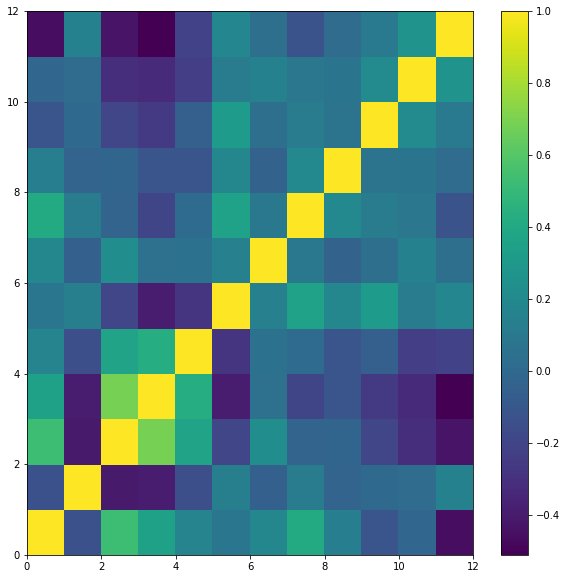

In [384]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 10))
plt.pcolor(corr_flavors)
plt.colorbar()
plt.show()

We now have a plot where we can see the correlation between each pair of taste attributes. We can also transpose the ``corr_flavors`` matrix to find correlations between the whiskies with respect to flavors (this can also be interpreted as the correlations between the whiskey refineries and the flavors of whiskey they produce).

In [385]:
corr_whiskies = flavors.T.corr()
corr_whiskies.iloc[:5, :5]

,0,1,2,3,4
0,1.000000,0.708632,0.697354,-0.147311,0.731902
1,0.708632,1.000000,0.503074,-0.228591,0.511834
2,0.697354,0.503074,1.000000,-0.140435,0.557020
3,-0.147311,-0.228591,-0.140435,1.000000,0.231617
4,0.731902,0.511834,0.557020,0.231617,1.000000


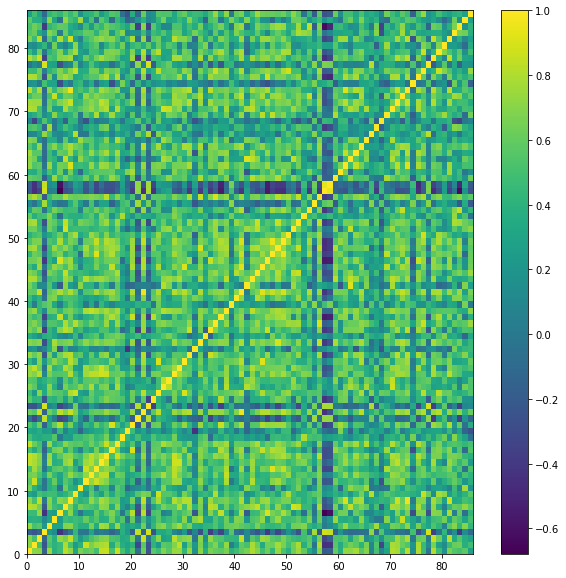

In [386]:
plt.figure(figsize=(10, 10))
plt.pcolor(corr_whiskies)
plt.colorbar()
plt.show()

## 4.1.4 Clustering Whiskies by Flavor Profile

Spectral co-clustering is a method for grouping data points into clusters. There exists a Python function called ``scipy.cluster.bicluster.SpectralCoclustering()`` that can be used to perform spectral co-clustering.

Although this problem is still computationally to solve directly, an approximate solution can be found using eigenvalues and eigenvectors of an adjacency matrix.

In [387]:
from sklearn.cluster import SpectralCoclustering


model = SpectralCoclustering(n_clusters=6, random_state=0) # create a spectral co-clustering model with 6 clusters (represnting the 6 regions)

model.fit(corr_whiskies) # fit the model to the whiskies data

model.rows_[:, :10]  # see the clusters as rows and the individual whiskies as columns, with "True" denoting that the whisky belongs to a certain cluster and "False" denoting that it does not

array([[False, False, False, False, False,  True, False, False, False,
        False],
       [False, False, False, False, False, False, False, False, False,
        False],
       [False,  True, False, False, False, False, False,  True, False,
        False],
       [False, False,  True, False, False, False,  True, False, False,
         True],
       [False, False, False,  True, False, False, False, False, False,
        False],
       [ True, False, False, False,  True, False, False, False,  True,
        False]])

In [388]:
np.sum(model.rows_, axis=1) # the number of whiskies in each cluster

array([20,  5, 19, 17,  6, 19])

In [389]:
model.row_labels_[:10] # the output denotes the cluster that each whisky belongs to

array([5, 2, 3, 4, 5, 0, 3, 2, 5, 3], dtype=int32)

## 4.1.5: Comparing Correlation Matrices

We are now ready to compare the correlation matrices between the actual regions of the whiskies to the approximate solutions.

In [390]:
whiskies["Group"] = pd.Series(model.row_labels_, index=whiskies.index)  # add a column to the dataframe with the cluster labels
whiskies = whiskies.iloc[whiskies["Group"].argsort()]  # sort the dataframe by the cluster labels
whiskies = whiskies.reset_index()  # reset the index

In [391]:
correlations = whiskies.iloc[:, 2:14].T.corr()  # the correlation matrix of the clusters after updating the indices
correlations = np.array(correlations)  # convert the correlation matrix to a numpy array

## 4.2.1 Introduction to GPS Tracking of Birds

We are going to do some data processing and analysis on GPS data from three seagulls, as collected by the LifeWatch INBO project. The data is stored in a CSV file called ``bird_tracking.csv``

In [392]:
import pandas as pd


birddata = pd.read_csv("bird_tracking.csv")
birddata.info()  # basic information about the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61920 entries, 0 to 61919
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          61920 non-null  int64  
 1   altitude            61920 non-null  int64  
 2   date_time           61920 non-null  object 
 3   device_info_serial  61920 non-null  int64  
 4   direction           61477 non-null  float64
 5   latitude            61920 non-null  float64
 6   longitude           61920 non-null  float64
 7   speed_2d            61477 non-null  float64
 8   bird_name           61920 non-null  object 
dtypes: float64(4), int64(3), object(2)
memory usage: 4.3+ MB


In [393]:
birddata.head()  # the first five rows of the dataframe

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric


## 4.2.2 Simple Data Visualizations

We will now plot the GPS data of one of the three seagulls. Note that this data represents positions on a sphere and not on a cartesian plane, so the data will appear quite distorted. A cartographic projection is used to make the data more readable, and will be done later on in this part. For now though, we want to get a feel for the data itself.

We start by importing the necessary modules.

In [394]:
import matplotlib.pyplot as plt, numpy as np

First, we will extract the indices in the ``birddata`` dataframe that correspond to the seagull Eric. We will store these indices in the array ``ix``.

In [395]:
eric_ix = birddata.bird_name == "Eric"

Then, we will extract the longitude and latitude of each of Eric's observations and record them as ``x`` and ``y`` coordinates in a cartesian plane. Again, this is not optimal for this particular data set as latitudes and longitudes correspond to a plan wrapped on a sphere, but it is fine for this example.

In [396]:
(x, y) = birddata.longitude[eric_ix], birddata.latitude[eric_ix]

We can now plot the data.

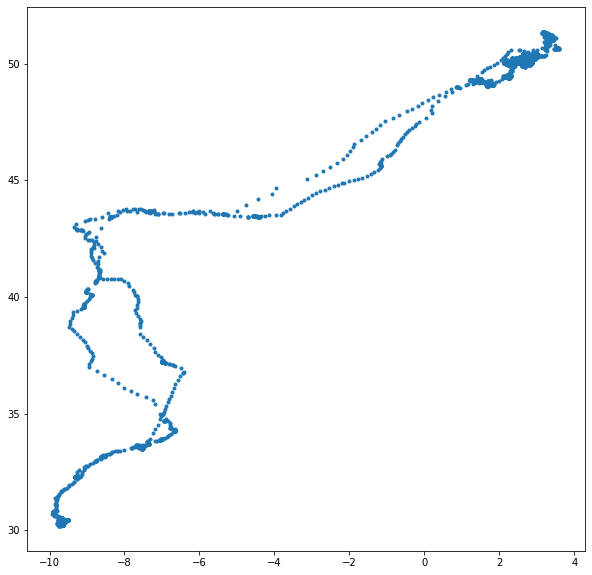

In [397]:
plt.figure(figsize=(10, 10))
plt.plot(x, y, ".")
plt.show()

From this graph, we can generally see a pattern in Eric's movement first heading northeast, then northwest, then northeast again for a longer distance. It appears that they then head in similar corridors back to the original starting point. There are also bigger gaps in some places in the graph, but it is unclear whether these are gaps due to measurement errors or because Eric was moving faster in some legs.

Now we will extend this plot for all three birds in which we are interested in this case study. We first start by storing the names of birds in the ``birddata`` dataframe in the array ``bird_names``.

In [398]:
bird_names = birddata.bird_name.unique()

Let us check the names of the birds in the dataframe.

In [399]:
bird_names

array(['Eric', 'Nico', 'Sanne'], dtype=object)

We can see that there are three birds in the dataframe: Eric, Nico, and Sanne.

Using very similar code looped over all three birds, we can now plot the data for each bird on a single figure.

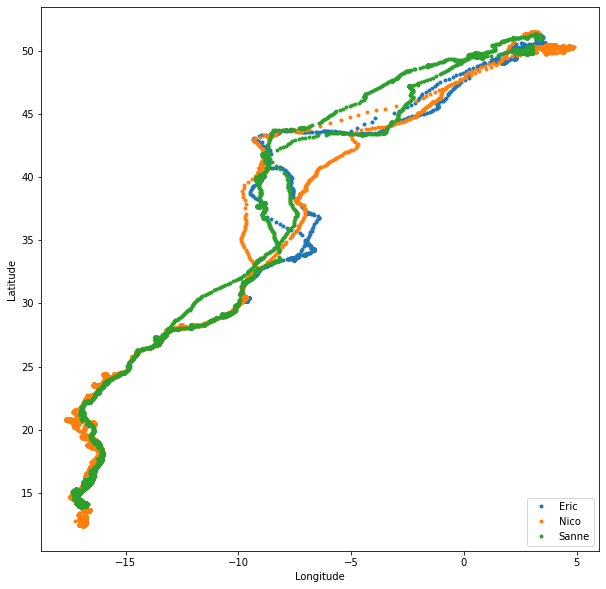

In [400]:
plt.figure(figsize=(10, 10))  # initialize the figure

for bird_name in bird_names:
    ix = birddata.bird_name == bird_name
    (x, y) = birddata.longitude[ix], birddata.latitude[ix]
    plt.plot(x, y, ".", label=bird_name)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc="lower right")
plt.show()

We can see that the flight paths of each bird are very similar, but Nico and Sanne seem to venture further south than Eric.

## 4.2.3 Examining Flight Speed

The column  ``speed_2d`` contains the speed of the seagulls approximated on a 2D cartesian plane. We will now examine and analyze this data, starting with the approximate speeds for just Eric.

In [401]:
eric_ix = birddata.bird_name == "Eric"  # get the indices of the bird data for Eric
speed = birddata.speed_2d[eric_ix]  # get the speed data for Eric

However, if you try to plot the speed data for eric using ``plt.hist``, you will get an error. This error does not come up for the first 10 data points. This indicates that this speed data may be containing objects that are not numbers. Let us run the following code to check for this error.

In [402]:
speed[np.isnan(speed) == True].shape

(85,)

We can not only see that there are indeed values in the speed data that are listed as NaN (not a number), but also that there are exactly 85 of these values. Let us extract the indices of these values to ignore them in the histogram plot.

In [403]:
nan_ix = np.isnan(speed) == True

Let us turn this array into the list of indices to include by using the bitwise NOT operator ``~``.

In [404]:
ix_include = ~nan_ix

We can now plot the speed data for Eric using the indices we have extracted.

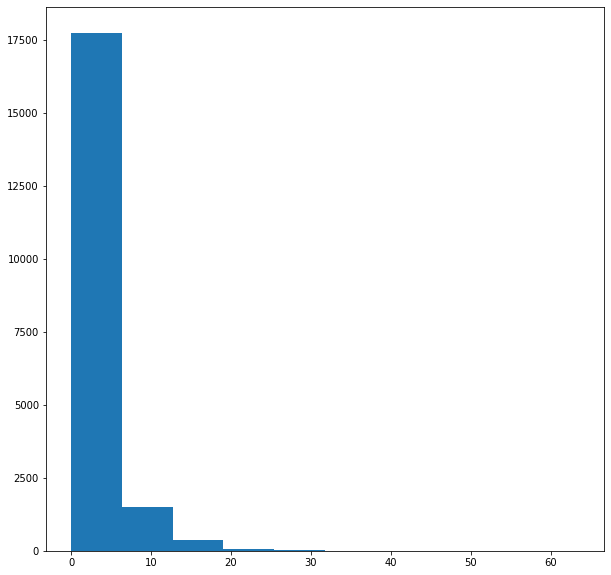

In [405]:
plt.figure(figsize=(10, 10))
plt.hist(speed[ix_include])
plt.show()

We will now normalize this graph and add labels to make the histogram more readable.

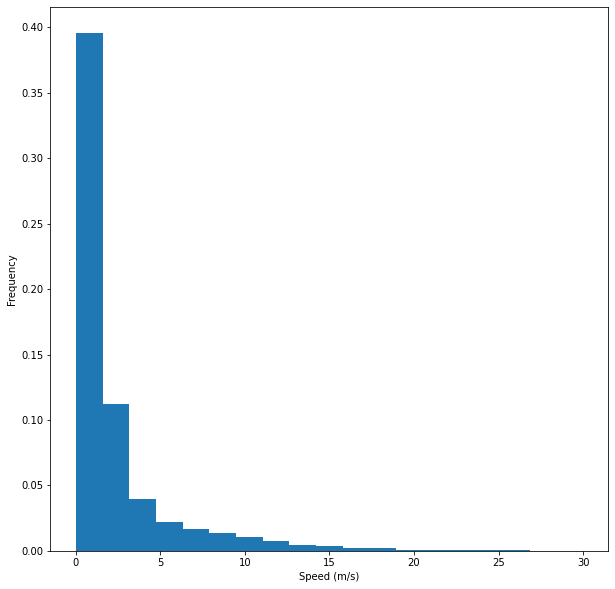

In [406]:
plt.figure(figsize=(10, 10))
plt.hist(speed[ix_include], bins=np.linspace(0, 30, 20), density=True)
plt.xlabel("Speed (m/s)")
plt.ylabel("Frequency")
plt.show()

This method of looking and excluding for NaNs in your data is a common and appreciated practice you should be familiar with. However, ``pandas`` actually has plotting functionality that can automatically handle this for you. The downside is that ``pandas`` plots are not as customizable as ``pyplot`` plots.

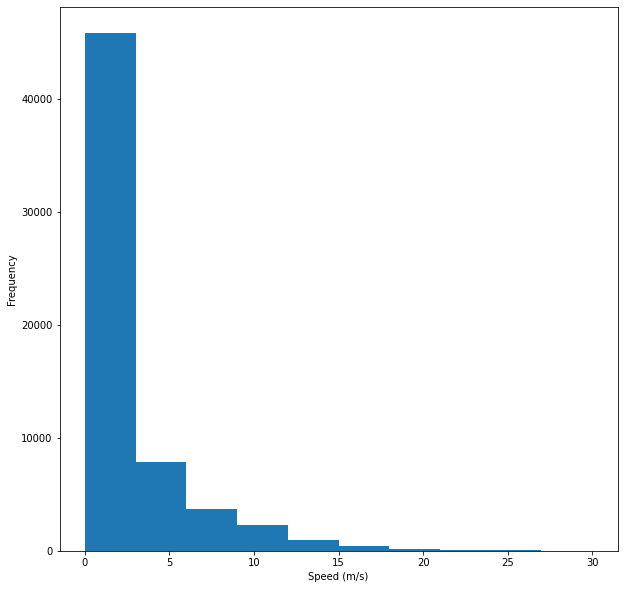

In [407]:
plt.figure(figsize=(10, 10))
birddata.speed_2d.plot(kind="hist", range=[0, 30])
plt.xlabel("Speed (m/s)")
plt.show()

## 4.2.4 Using DateTime

In ``birddata`` we have a column ``date_time`` that contains the date and time of the observations. Let us examine a few of these datetime objects.

In [408]:
birddata.date_time[0:3]

0    2013-08-15 00:18:08+00
1    2013-08-15 00:48:07+00
2    2013-08-15 01:17:58+00
Name: date_time, dtype: object

These entries are all `str`'s. If we want to operate on these datetime entries, we need to covert them into datetime objects. These objects are in the format ``datetime.datetime(year, month, day, hour, minute, second)``. Let us try converting the first datetime entry to a datetime object.

In [409]:
import datetime

date_str = birddata.date_time[0]  # get the first datetime entry, which is a string
print(type(date_str))  # check the type of the entry, returns "str"
date = datetime.datetime.strptime(
    date_str[:-3],  # strip the string of the whitespace and the last three characters, which correspond to the UTC offset
    "%Y-%m-%d %H:%M:%S"  # give the format of the data in the string to effectively convert it to a datetime object
)
date

<class 'str'>


datetime.datetime(2013, 8, 15, 0, 18, 8)

We can now adapt this code to convert all of the datetime entries in ``birddata`` to datetime objects.

In [410]:
timestamps = [] # create an empty list to store the datetime objects
for k in range(len(birddata.date_time)):  # loop over the entries in the date_time column
    timestamps.append(
        datetime.datetime.strptime(
            birddata.date_time.iloc[k][:-3],  # strip the string of the whitespace and the last three characters, which correspond to the UTC offset
            "%Y-%m-%d %H:%M:%S"  # give the format of the data in the string to effectively convert it to a datetime object
        )
    ) # append the datetime object to the timestamps list

Let us now add these datetime objects to the ``birddata`` dataframe.

In [411]:
birddata["timestamp"] = pd.Series(timestamps, index=birddata.index)
birddata.head()  # check the first few entries

,Unnamed: 0,altitude,date_time,device_info_serial,direction,latitude,longitude,speed_2d,bird_name,timestamp
0,0,71,2013-08-15 00:18:08+00,851,-150.469753,49.419860,2.120733,0.150000,Eric,2013-08-15 00:18:08
1,1,68,2013-08-15 00:48:07+00,851,-136.151141,49.419880,2.120746,2.438360,Eric,2013-08-15 00:48:07
2,2,68,2013-08-15 01:17:58+00,851,160.797477,49.420310,2.120885,0.596657,Eric,2013-08-15 01:17:58
3,3,73,2013-08-15 01:47:51+00,851,32.769360,49.420359,2.120859,0.310161,Eric,2013-08-15 01:47:51
4,4,69,2013-08-15 02:17:42+00,851,45.191230,49.420331,2.120887,0.193132,Eric,2013-08-15 02:17:42


Let us now make a list that stores the elapsed time for each observation for Eric from the beginning of data collection.

In [412]:
times = birddata.timestamp[birddata.bird_name == "Eric"]  # get the timestamps for Eric
elapsed_times = np.array([time - times[0] for time in times])  # get the elapsed times for Eric
elapsed_times[:5] # check the first few entries

array([Timedelta('0 days 00:00:00'), Timedelta('0 days 00:29:59'),
       Timedelta('0 days 00:59:50'), Timedelta('0 days 01:29:43'),
       Timedelta('0 days 01:59:34')], dtype=object)

Note that differences in DateTime objects are returned as special TimeDelta objects. To convert these DateTime objects to a certain time measurement, we can divide by a TimeDelta object corresponding to one unit of time. For example, if we want to convert the elapsed times to days, we can do so by dividing by a TimeDelta object corresponding to one day.

In [413]:
days_elapsed = elapsed_times / datetime.timedelta(days=1)
days_elapsed[:5] # check the first few entries

array([0.0, 0.02082175925925926, 0.04155092592592593, 0.06230324074074074,
       0.0830324074074074], dtype=object)

Let's plot some of this data.

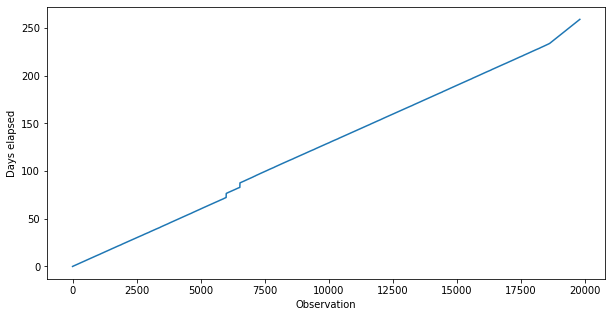

In [414]:
plt.figure(figsize=(10, 5))
plt.plot(days_elapsed)
plt.xlabel("Observation")
plt.ylabel("Days elapsed")
plt.show()

For a perfect dataset with equal jumps, we expect a perfect line for this plot. However, we see some jumps. This indicates that there are some data points that are unevenly spaced, and so relying on algorithms that expect perfect spacing is not a good idea for this case.

## 4.2.5 Calculating Daily Mean Speed

To calculate daily mean speeds, we need to first group the data by day. This involves iterating through rows in the data frame and grouping the rows until we reach an index that corresponds to the next day.

In [415]:
next_day = 1  # initialize the index of the next day
inds = []  # initialize an empty list to store the indices of observations in the current day
daily_mean_speeds = []  # initialize an empty list to store the mean daily speeds

for (i, t) in enumerate(days_elapsed):  # loop over the elapsed times
    if t < next_day:  # if the elapsed time is less than the next day
        inds.append(i) # append the index of the current observation to the list of indices

    else:  # if the elapsed time is greater than the next day
        daily_mean_speeds.append(birddata.speed_2d[inds].mean())  # get the mean speed for the current day
        next_day += 1  # increment the index of the next day
        inds = []  # reset the list of indices

daily_mean_speeds = np.array(daily_mean_speeds)  # convert the list to a numpy array
daily_mean_speeds[:5] # check the first few entries

array([2.12151651, 2.61910524, 1.786315  , 2.94542359, 2.47624275])

Let's plot the daily mean speeds.

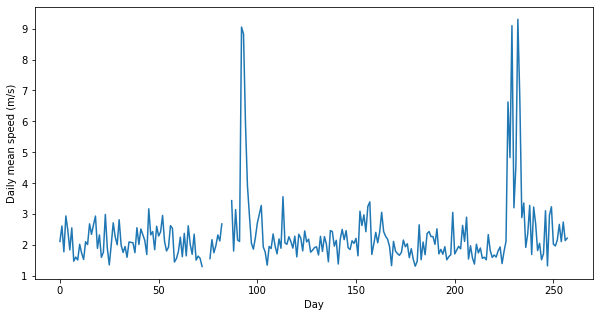

In [416]:
plt.figure(figsize=(10, 5))
plt.plot(daily_mean_speeds)
plt.xlabel("Day")
plt.ylabel("Daily mean speed (m/s)")
plt.show()

We see that Eric flies mostly at just above 2 m/s daily except for a few days when he flies significantly faster. These peaks correspond to the days when he flies at the highest speed, which naturally are his days of migration. Hence, the peaks in this graph represent the days and average daily speeds of migration.

In [417]:
# Comprehension Check Question
birddata[birddata.bird_name == "Sanne"].date_time.head()  # what are the first few timestamps recorded for Sanne?

40916    2013-08-15 00:01:08+00
40917    2013-08-15 00:31:00+00
40918    2013-08-15 01:01:19+00
40919    2013-08-15 01:31:38+00
40920    2013-08-15 02:01:24+00
Name: date_time, dtype: object

## 4.2.6 Using the Cartopy Module

Cartopy is a library for plotting maps. It is a great tool for visualizing data, especially location data such as longitude and latitude.

In [418]:
from cartopy import crs as ccrs, feature as cfeature

Let us visualize the flight paths of the three seagulls using Cartopy, specifically the Mercator standard projection.

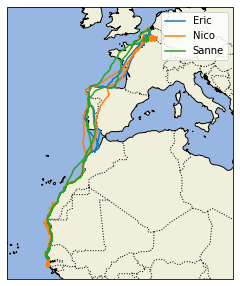

In [419]:
proj = ccrs.Mercator()  # create a Mercator projection

plt.figure(figsize=(10, 5))  # create a figure
ax = plt.axes(projection=proj)  # create an axes using the Mercator projection
ax.set_extent([-25.0, 20.0, 52, 10])  # set the extent of the plot

for bird in bird_names:  # loop over the bird names
    ix = birddata.bird_name == bird  # get the indices of the observations for the current bird
    x, y = birddata.longitude[ix], birddata.latitude[ix]  # get the longitude and latitude
    ax.plot(x, y, transform=ccrs.Geodetic(), label=bird)  # plot the longitude and latitude

# More features to plot
ax.add_feature(cfeature.OCEAN)  # add the oceans
ax.add_feature(cfeature.LAND)  # add the land
ax.add_feature(cfeature.COASTLINE)  # add the coastlines
ax.add_feature(cfeature.BORDERS, linestyle=':')  # add the borders

ax.legend()  # add a legend
plt.show()  # show the plot

Here, we see the flight trajectories of all three birds, but these paths now correspond to paths on the globe rather than on a cartesian plane. We can also see exactly where the birds are flying: from the west coast of Africa up through the Portuguese and Spanish costs to the northern coast of Europe near Belgium, France, and Germany.

## 4.3.1 Introduction to Network Analysis

GRAPH THEORY MAKES A RETURN

A *network* is the real-world implementation of a *graph*, which is mathematically abstract.

## 4.3.2 Basics of NetworkX

NetworkX is a Python library for analyzing and visualizing networks and graphs.

In [420]:
import networkx as nx  # import the NetworkX module

Let us create an example undirected graph.

In [421]:
G = nx.Graph()  # create an empty graph
G.add_node(1)  # add a node
G.add_nodes_from([2, 3, 4])  # add multiple nodes

Let us see what nodes are in the graph G.

In [422]:
G.nodes()  # get the nodes

NodeView((1, 2, 3, 4))

Let us add edges to the graph.

In [423]:
G.add_edge(1, 2)  # add an edge
G.add_edges_from([(1, 3), (1, 4)])  # add multiple edges

Let us see what edges are in the graph G.

In [424]:
G.edges()  # get the edges

EdgeView([(1, 2), (1, 3), (1, 4)])

Removing nodes and edges work analogously to adding them.

Let us find out the number of vertices and edges in the graph G.

In [425]:
G.number_of_nodes()  # get the number of nodes

4

In [426]:
G.number_of_edges()  # get the number of edges

3

## 4.3.3 Graph Visualization

Let's play around with the Karate Club graph, built into NetworkX.

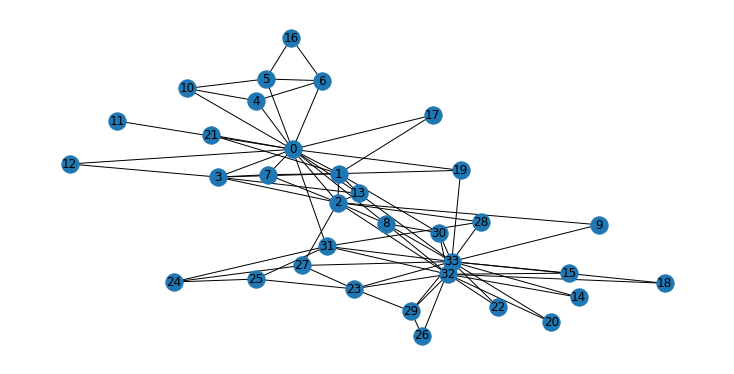

In [427]:
K = nx.karate_club_graph()  # create the graph

# We visualize the graph using pyplot
plt.figure(figsize=(10, 5))  # create a figure
nx.draw(K, with_labels=True)  # draw the graph
plt.show()  # show the plot

The degrees of each vertex in a graph ``G`` can be accessed using ``G.degree()``. This returns a DegreeView object, which we can iterate over to get the degree of each vertex. It works very similarly to a Python dictionary.

In [428]:
K.degree()

DegreeView({0: 16, 1: 9, 2: 10, 3: 6, 4: 3, 5: 4, 6: 4, 7: 4, 8: 5, 9: 2, 10: 3, 11: 1, 12: 2, 13: 5, 14: 2, 15: 2, 16: 2, 17: 2, 18: 2, 19: 3, 20: 2, 21: 2, 22: 2, 23: 5, 24: 3, 25: 3, 26: 2, 27: 4, 28: 3, 29: 4, 30: 4, 31: 6, 32: 12, 33: 17})

Let us find out how many edges are in the graph ``K``.

In [429]:
K.number_of_edges()  # get the number of edges

78

## 4.3.4 Random Graphs

The simplest random graph model is the Erdos-Renyi (ER) graph model. It has two parameters:
1. `N`: the number of nodes
2. `p`: the probability of an edge between two nodes

Our goal is to create an ER graph generator as a Python function.

In [430]:
def er_graph(N: int, p: float) -> nx.Graph:
    """
    Generate an Erdos-Renyi graph with N nodes and probability p of an edge between any two nodes.

    :param N: the number of nodes
    :param p: the probability of an edge between two nodes

    :return: the generated ER random graph
    """
    from scipy.stats import bernoulli
    from itertools import combinations

    try:
        assert(0 <= p <= 1)  # check that p is between 0 and 1
    except AssertionError:
        raise ValueError("p must be between 0 and 1")

    G = nx.Graph()  # create an empty graph
    G.add_nodes_from(range(N))  # add N nodes

    for node1, node2 in combinations(G.nodes(), 2):
        if bernoulli.rvs(p=p):
            G.add_edge(node1, node2)

    return G  # return the graph

Now let us use this function to create a random graph with 10 nodes and probability 0.2 of an edge between any two nodes.

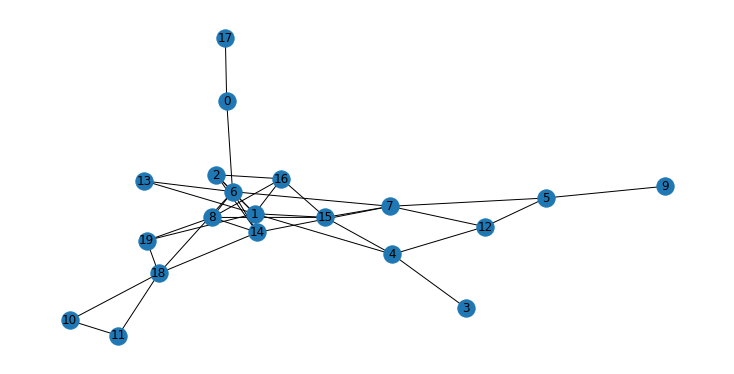

In [432]:
plt.figure(figsize=(10, 5))  # create a figure
nx.draw(er_graph(N=20, p=0.2), with_labels=True)  # draw the graph
plt.show()  # show the plot

## 4.3.5 Plotting the Degree Distribution